In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, mean_squared_error as MSE
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv('../australian.csv')
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


### 1.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [8]:
df.var()

A1     2.185398e-01
A2     1.405001e+02
A3     2.478211e+01
A4     1.849540e-01
A5     1.356644e+01
A6     3.969323e+00
A7     1.119915e+01
A8     2.498244e-01
A9     2.451042e-01
A10    2.364819e+01
A11    2.485938e-01
A12    8.928925e-02
A13    2.963882e+04
A14    2.714517e+07
A15    2.473255e-01
dtype: float64

#### Selecting features for Model (Feature Selection)

In [9]:
#feature selection
from sklearn.feature_selection import RFE

X = df.drop('A15',axis=1)
y = df['A15']

reg = LinearRegression()
rfe = RFE(reg,n_features_to_select=8)
rfe_ = rfe.fit(X, y)

print(X.columns)
print(rfe_.support_)
print(rfe.ranking_)


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14'],
      dtype='object')
[False False False  True  True False  True  True  True  True  True  True
 False False]
[3 5 4 1 1 2 1 1 1 1 1 1 6 7]


#### Droping columns that are not important/redundant for model based on above RFE feature selection

In [10]:
df2 = df.drop(['A1','A2','A3','A6','A13','A14'],axis=1)

df2

,A4,A5,A7,A8,A9,A10,A11,A12,A15
0,2,4,1.585,0,0,0,1,2,0
1,2,8,0.165,0,0,0,0,2,0
2,1,4,1.250,0,0,0,1,2,0
3,1,5,0.000,1,1,11,1,2,1
4,2,6,1.960,1,1,14,0,2,1
...,...,...,...,...,...,...,...,...,...
685,2,14,6.500,1,0,0,0,2,1
686,2,8,0.125,0,0,0,0,2,0
687,2,6,0.085,1,0,0,0,2,1
688,2,14,3.085,1,1,1,0,2,1


#### Removing Outliers

<AxesSubplot:>

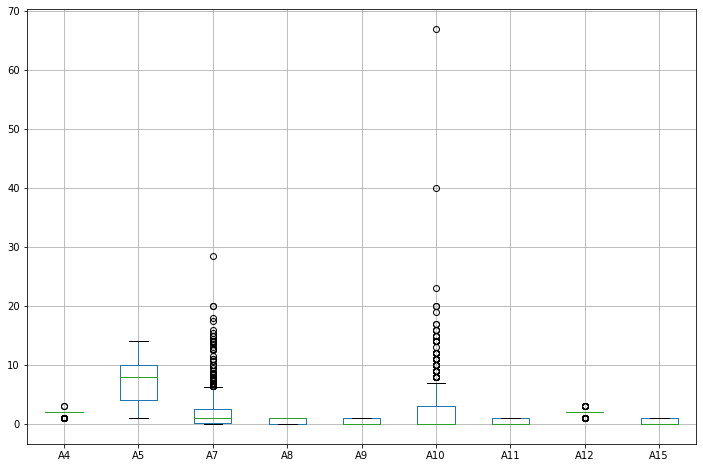

In [11]:
df2.boxplot(figsize=(12,8))

In [12]:
# Replacing outliers with nulls in all the feature columns

for x in ['A4','A5','A7','A8','A9','A10','A11','A12']:
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan

In [13]:
df2.isnull().sum()

A4     165
A5       0
A7      63
A8       0
A9       0
A10     79
A11      0
A12     65
A15      0
dtype: int64

In [14]:
# Droping all null values from Dataframe
df2 = df2.dropna(axis=0)

In [15]:
df2.isnull().sum()

A4     0
A5     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A15    0
dtype: int64

In [16]:
# Dataframe after removing null values
df2

,A4,A5,A7,A8,A9,A10,A11,A12,A15
0,2.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,0
1,2.0,8.0,0.165,0.0,0.0,0.0,0.0,2.0,0
5,2.0,8.0,1.500,1.0,1.0,2.0,0.0,2.0,1
6,2.0,3.0,0.125,0.0,0.0,0.0,0.0,2.0,0
7,2.0,11.0,3.040,1.0,1.0,6.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...
682,2.0,13.0,0.040,1.0,0.0,0.0,0.0,2.0,1
683,2.0,3.0,0.335,0.0,0.0,0.0,0.0,2.0,0
686,2.0,8.0,0.125,0.0,0.0,0.0,0.0,2.0,0
687,2.0,6.0,0.085,1.0,0.0,0.0,0.0,2.0,1


### 2.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df2.drop('A15',axis=1)
y = df2['A15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

model = tree.DecisionTreeClassifier(max_depth= 4, random_state=42)


model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1]


In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[38  5]
 [ 5 27]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.84      0.84      0.84        32

    accuracy                           0.87        75
   macro avg       0.86      0.86      0.86        75
weighted avg       0.87      0.87      0.87        75



In [478]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8666666666666667


### With Decision tree model we got accuracy score of 0.86666. Now we will try runing our model to improve accuracy score using GridSeachCV method.

In [415]:
# Checking all the parameters 
print(model.get_params())   

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [416]:
# Creating gridSeachCV with some parameters combination

from sklearn.model_selection import GridSearchCV

params_dt = {'max_depth': [3,4,5,6],
            'min_samples_leaf':[0.04,0.06,0.08],
            'max_features':[0.2,0.3,0.5,0.8]}

grid_dt = GridSearchCV(estimator=model,param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

grid_dt.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.3, 0.5, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [417]:
best_hyp = grid_dt.best_params_

print('Best hyperparameters :/n' , best_hyp)

Best hyperparameters :/n {'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.06}


In [418]:
best_cv_score = grid_dt.best_score_


print('Best CV accuracy',best_cv_score)

Best CV accuracy 0.8862068965517242


In [419]:
#best_model = tree.DecisionTreeClassifier(max_depth= 5, random_state=42, max_features= 0.8, min_samples_leaf=0.04)
best_model = grid_dt.best_estimator_
print(grid_dt.best_estimator_)

DecisionTreeClassifier(max_depth=4, max_features=0.8, min_samples_leaf=0.06,
                       random_state=42)


In [420]:
best_model = best_model.fit(X_train,y_train)

y_pred = best_model.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1]


In [421]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37  6]
 [ 3 29]]


In [422]:
# Accuracy score after tuning model with best estimators 

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.88


### Using GridSeachCV method for tuning up our model we got slight increase in accuracy score. It got up from 0.86666 to 0.88. In tunning up model we used different combination of hyperparameters. We used max_depth, min_samples_leaf and max_features and provided some values so it can run model on these combinations. We used [3,4,5,6] for max_depth for the decision tree, [0.04,0.06,0.08] for min_samples_leaf and [0.2,0.3,0.5,0.8] for max_features and ran model on this hyperparameters to find best combination. Usng best_estimator_ we found out that max_depth=4, max_features=0.8 and min_samples_leaf=0.06 were best hyperparamters and gave us 0.88 accuracy score. I tried changing some values for those hyperparameters but I was not able to get more than 0.88. 

### 3.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [423]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4, random_state=42)

In [424]:
rf_model = rf.fit(X_train,y_train)


y_pred = rf_model.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1]


In [425]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37  6]
 [ 3 29]]


In [426]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.83      0.91      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [427]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.88


#### Now we will try to tune our model to see if we get any better score. But we decreased score instead. Without tuning up we got .88 and after tuning up the model score went down to 0.85. 

In [428]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [429]:
params_rf = {'n_estimators':[100,200,300,400,500],
            'max_depth':[4,5,6,7],
            'min_samples_leaf':[0.01,0.02,0.03,0.04],
             'max_features':['log2','sqrt']
            }

grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv=10, scoring='accuracy',n_jobs=-1 )

In [430]:
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [431]:
best_hyp = grid_dt.best_params_

print('Best hyperparameters :/n' , best_hyp)

Best hyperparameters :/n {'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.06}


In [432]:
bestrf_model = grid_rf.best_estimator_

In [433]:
best_model_rf = bestrf_model.fit(X_train,y_train)

In [434]:
y_pred = bestrf_model.predict(X_test)
print(y_pred)

[1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1]


In [435]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[36  7]
 [ 4 28]]


In [436]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8533333333333334


### 4.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [20]:
from xgboost import XGBClassifier

X = df2.drop('A15',axis=1)
y = df2['A15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train,y_train)

[13:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = xgb.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1]


In [22]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score :',accuracy)

Accuracy score : 0.88


#### Now we will try to tune up our xgboost model using GridSeachCV method so it will have better accuracy score.

In [24]:
params_xgb = {'n_estimators':[100,200,300,400,500],
            'max_depth':[4,5,6,7],
            'tree_method': ['auto','exact','hist']
            }

grid_xgb = GridSearchCV(estimator = xgb, param_grid = params_xgb, cv=10, scoring='accuracy',n_jobs=-1 )

In [25]:
grid_xgb.fit(X_train,y_train)

c:\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
       

In [27]:
best_hyp = grid_xgb.best_params_

print('Best hyperparameters :/n' , best_hyp)

Best hyperparameters :/n {'max_depth': 7, 'n_estimators': 200, 'tree_method': 'hist'}


In [28]:
bestxgb_model = grid_xgb.best_estimator_

In [29]:
best_model_xgb = bestxgb_model.fit(X_train,y_train)

[13:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
y_pred = bestxgb_model.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1]


In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37  6]
 [ 4 28]]


In [33]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8666666666666667


#### With tuning up our model for xgboost I saw decrease in accuracy score. I tried different hyper parameters but was not able to get better score.

### 5.	Which model performed best? What is your performance metric? Why? 

#### Decision Tree model with GridSearchCV method and Random forest (without tune up) and XGBoost (without tune up) got the best score of 0.88. 